In [1]:
!pwd

/home/lab/Documents/Human/Elevator_Sound_Classification


In [3]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook as tqdm
import os
from glob import glob

In [348]:
import soundfile

path_dir = '/home/lab/Documents/Human/ESC-50-master/Record/1/'
file_list = os.listdir(path_dir)
#print(file_list)
for file in file_list:
    if ' ' in file:
        os.rename(path_dir + file, path_dir + file.replace(' ', ''))
        file = file.replace(' ', '')
    data, sr = librosa.load(path_dir + file)
    for i in range(-5, 6):
        output_file_name = file.replace('.wav', '_' + str(i) + '.wav')
        if output_file_name in file_list:
            continue
        pitch_data = librosa.effects.pitch_shift(data, sr, i)
        soundfile.write(path_dir + output_file_name, pitch_data, sr)

KeyboardInterrupt: 

In [ ]:
for dir_num in range(2, 21):
    path_dir = '/home/lab/Documents/Human/ESC-50-master/Record/' + dir_num + '/'
    file_list = os.listdir(path_dir)
    #print(file_list)
    for file in file_list:
        if ' ' in file:
            os.rename(path_dir + file, path_dir + file.replace(' ', ''))
            file = file.replace(' ', '')
        data, sr = librosa.load(path_dir + file)
        for i in range(-5, 6):
            output_file_name = file.replace('.wav', '_' + str(i) + '.wav')
            if output_file_name in file_list:
                continue
            pitch_data = librosa.effects.pitch_shift(data, sr, i)
            soundfile.write(path_dir + output_file_name, pitch_data, sr)

In [7]:
import numpy as np
import librosa
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
    wav,sr = librosa.load(file_path,sr=sr)
    if wav.shape[0]<5*sr:
        wav = np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
    else:
        wav=wav[:5*sr]
        spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
        spec_db=librosa.power_to_db(spec,top_db=top_db)
    return spec_db

In [8]:
def spec_to_image(spec, eps=1e-6):
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()
    spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.uint8)
    return spec_scaled

1
10
11
12
13
14
15
16
17
18
19
2
20
3
4
5
6
7
8
9


<Figure size 432x288 with 0 Axes>

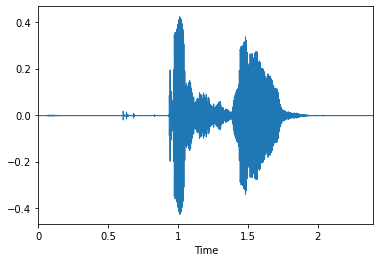

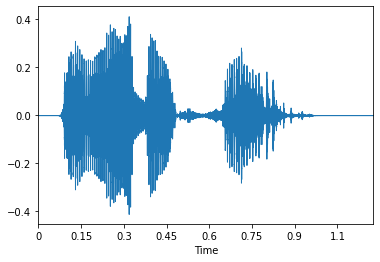

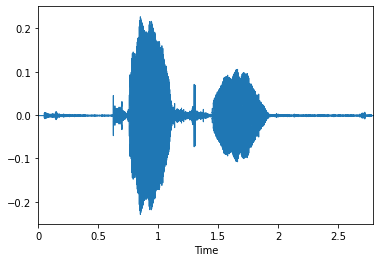

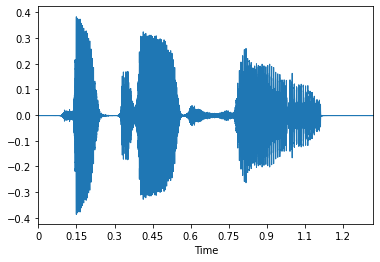

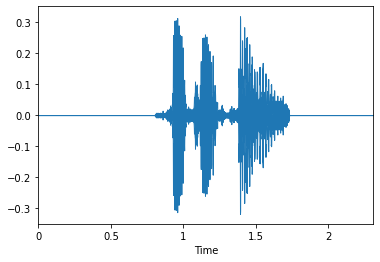

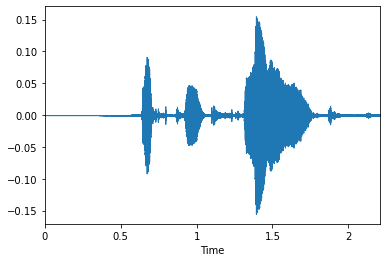

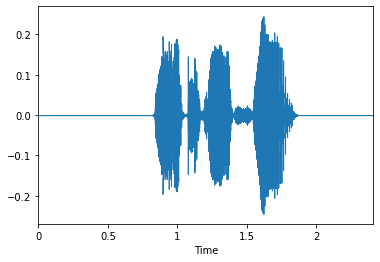

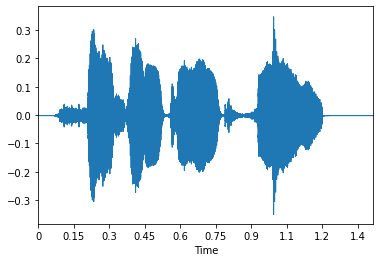

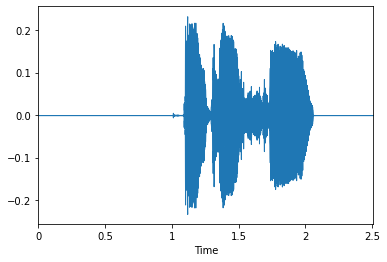

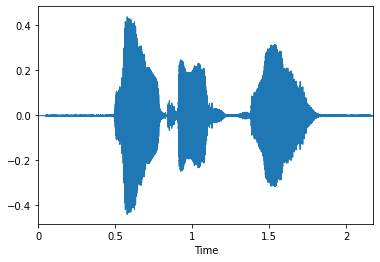

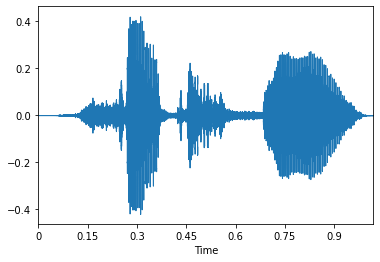

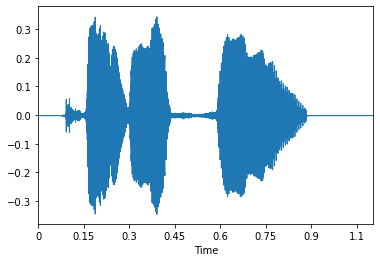

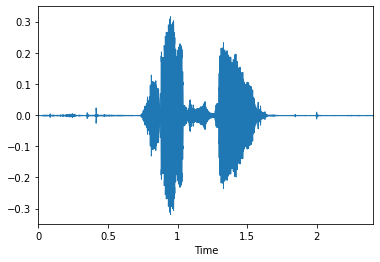

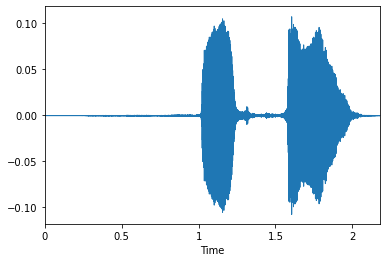

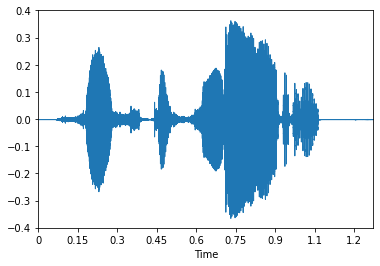

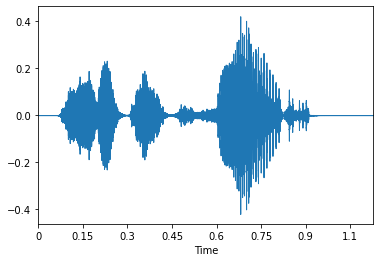

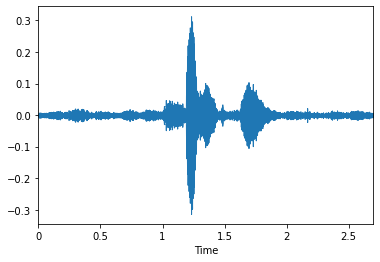

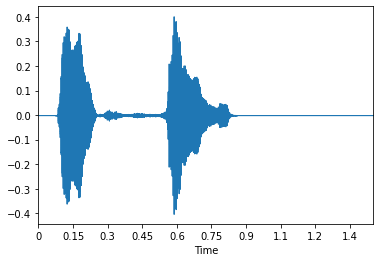

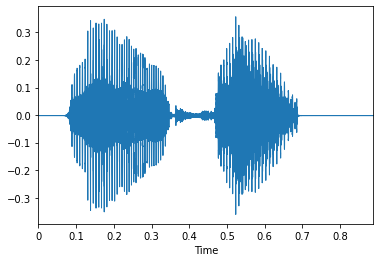

In [5]:

folders = sorted(glob(os.path.join('/home/lab/Documents/Human/Elevator_Sound_Classification/Record', '*')))
for folder in folders:
    print(folder.split('/')[-1])
    files = os.listdir(folder)[:1]
    plt.figure()
    for file in files:        
        file_path = os.path.join(folder, file)
        wav, sr = librosa.load(file_path)
        librosa.display.waveplot(wav, sr)
        
        
      
        
    
fail_list = ['Abishini A.H..', 'Craig Emmington','Guilherme Vieira de Araújo', 'TTSmale', 'Anbu Sankar', 'Craig Emmington','TTSfemale', 'Matt D M Burrell' ]    


        
#             print(wav.shape, sr)
#             librosa.display.waveplot(wav, sr)


      
          
        

(128, 87)
[[-68.772964 -52.45265  -46.222908 ... -37.482533 -28.454414 -22.962328]
 [-57.268948 -48.462624 -42.413757 ... -32.880615 -34.36881  -24.355598]
 [-50.055546 -44.682228 -44.20294  ... -32.181458 -29.560696 -24.851452]
 ...
 [-67.77383  -70.0298   -72.39976  ... -79.624664 -78.65799  -74.40774 ]
 [-61.15685  -62.681904 -65.00251  ... -77.08976  -77.21772  -75.295784]
 [-57.41443  -58.61293  -55.697384 ... -78.04011  -78.11276  -77.83131 ]]


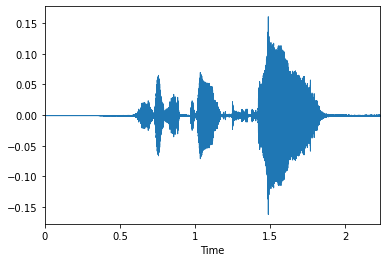

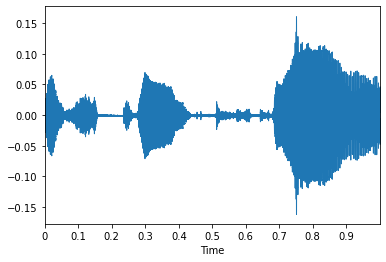

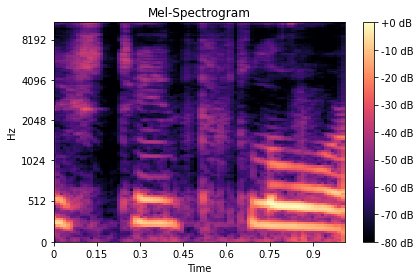

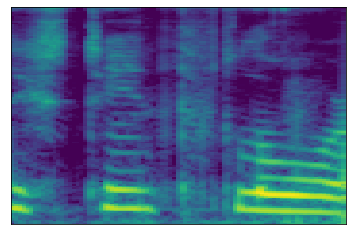

In [10]:
# stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512)
# D = np.abs(stft_result)
# S_dB = librosa.power_to_db(D, ref=np.max)
# librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='mel', x_axis='time', cmap = cm.jet)
# plt.colorbar(format='%2.0f dB')
# plt.show()


file_path = '/home/lab/Documents/Human/Elevator_Sound_Classification/Record/16/정정원_16.wav'
# n_fft= 2048
# hop_length= int(n_fft/4)

n_fft= int(2048/2)
hop_length= int(n_fft/4)

top_db = 80

wav, sr = librosa.load(file_path)
plt.figure()
librosa.display.waveplot(wav, sr) #자르기전

spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,hop_length=hop_length, n_mels=128, fmin=20, fmax=8300) #x:time, y:amplitude


# plt.figure(figsize=(10, 4))
# librosa.display.specshow(librosa.power_to_db(spec, ref=np.max), y_axis='mel', sr=sr, hop_length=hop_length, x_axis='time')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel-Spectrogram')
# plt.tight_layout()
# plt.savefig('Mel-Spectrogram example.png')
# plt.show()


start_idx = 0
for i in range(wav.shape[0]):
    if abs(wav[i]) < 0.025: continue
    start_idx = i
    break
wav_cut = wav[start_idx:start_idx + sr*1] #자른후
plt.figure()
librosa.display.waveplot(wav_cut, sr)


spec=librosa.feature.melspectrogram(wav_cut, sr=sr, n_fft=n_fft,hop_length=hop_length, n_mels=128, fmin=20, fmax=8300) #x:time, y:amplitude
plt.figure()
spec_db = librosa.power_to_db(spec, ref=np.max)
print(spec_db.shape)
print(spec_db)
librosa.display.specshow(spec_db, y_axis='mel', sr=sr, hop_length=hop_length, x_axis='time')
librosa.display.specshow(librosa.power_to_db(spec, ref=np.max), y_axis='mel', sr=sr, hop_length=hop_length, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

plt.figure()
librosa.display.specshow(spec_to_image(spec_db), cmap='viridis')
# plt.savefig('Mel-Spectrogram example.png', transparent = True)
plt.show()



power_to_db 전
power_to_db 후, 4096
power_to_db 후, 4096/4


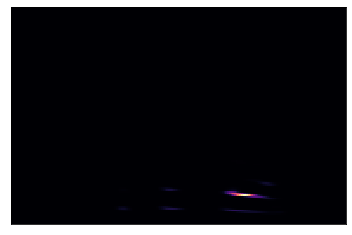

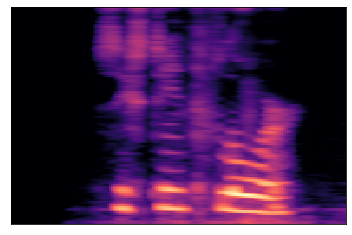

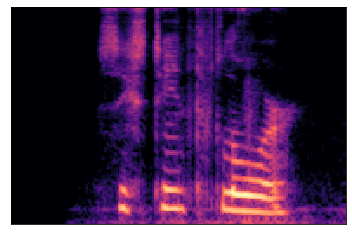

In [206]:
file_path = '/home/lab/Documents/Human/ESC-50-master/Record/16/정정원_16.wav'
wav, sr = librosa.load(file_path)
spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=int(4096),hop_length=hop_length, n_mels=128, fmin=20, fmax=8300) #x:time, y:amplitude
spec1=librosa.feature.melspectrogram(wav, sr=sr, n_fft=int(4096/4),hop_length=hop_length, n_mels=128, fmin=20, fmax=8300) #x:time, y:amplitude

#win_length가 커질수록  더 정밀한 주파수 분포를 얻을 수 있으나 시간에 따른 주파수 변화를 관찰하기가 어려워집니다

print("power_to_db 전")
plt.figure()
librosa.display.specshow(spec)


print("power_to_db 후, 4096")
plt.figure()
spec_db = librosa.power_to_db(spec, ref=np.max)
librosa.display.specshow(spec_db)

print("power_to_db 후, 4096/4")
plt.figure()
spec_db = librosa.power_to_db(spec1, ref=np.max)
librosa.display.specshow(spec_db)


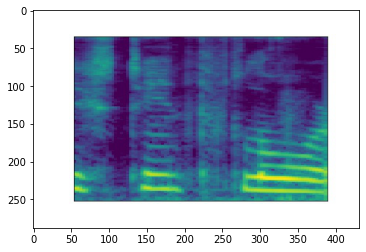

In [92]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('./Mel-Spectrogram example.jpg', 'r')
# pil_im.show()
imshow(np.array(pil_im))

In [332]:

class Data(Dataset):
    def __init__(self, wavs_path):
       
        self.data = []
        self.labels = []
        self.wavs_path = wavs_path
        self.n_fft= int(1024)
        self.hop_length= int(self.n_fft/4) #
        self.top_db = 80
        self.fmin = 20
        self.fmax = 8300
        self.sr = int(22050 * 1.0)
       
        
        for path in tqdm(self.wavs_path):
            self.labels.append(int(path.split('/')[-2]))
            
            wav, sr = librosa.load(path)
            start_idx = 0
            for i in range(wav.shape[0]):
                if abs(wav[i]) < 0.025: continue
                start_idx = i
                break
            wav_cut = wav[start_idx:start_idx + int(self.sr)]
            shape = wav_cut.shape[0]
            if  shape< self.sr:
                wav_cut = np.pad(wav_cut,int(np.ceil((1* self.sr-shape)/2)),mode='constant')
                wav_cut = wav_cut[: self.sr]
            

            if wav_cut.shape[0] !=  self.sr:
                print(path, wav_cut.shape)
                
            spec=librosa.feature.melspectrogram(wav_cut, sr=self.sr, n_fft=self.n_fft,hop_length=self.hop_length, fmin=self.fmin, fmax=self.fmax)
            spec_db=librosa.power_to_db(spec,top_db=self.top_db)
            self.data.append(spec_to_image(spec_db))
            
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
    
    def spec_to_image(spec, eps=1e-6):
        mean = spec.mean()
        std = spec.std()
        spec_norm = (spec - mean) / (std + eps)
        spec_min, spec_max = spec_norm.min(), spec_norm.max()
        spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
        spec_scaled = spec_scaled.astype(np.uint8)
        return spec_scaled


      
          
        

In [333]:
class Model(nn.Module):
    def __init__(self, input_shape, batch_size=16, num_category=20):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size = 3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.conv7 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn8 = nn.BatchNorm2d(256)
        self.dense1 = nn.Linear(256*(((input_shape[1]//2)//2)//2)*(((input_shape[2]//2)//2)//2),500)
        self.dropout = nn.Dropout(0.5)
        self.dense2 = nn.Linear(500, num_category)
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = F.max_pool2d(x, kernel_size=2) 
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv5(x)
        x = F.relu(self.bn5(x))
        x = self.conv6(x)
        x = F.relu(self.bn6(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv7(x)
        x = F.relu(self.bn7(x))
        x = self.conv8(x)
        x = F.relu(self.bn8(x))
        x = x.view(x.size(0),-1)
        x = F.relu(self.dense1(x))
        x = self.dropout(x)
        x = self.dense2(x)
        return x

In [334]:
wavs_path = glob(os.path.join('/home/lab/Documents/Human/ESC-50-master/Record', '*', '*'))
train_data = Data(wavs_path)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)


/home/lab/pytoch1.5/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


In [335]:
if torch.cuda.is_available():
    device=torch.device('cuda:1')
else:
    device=torch.device('cpu')

In [336]:
a, b = train_data.__getitem__(0)
print(a.shape)

(128, 173)


In [337]:
shape = train_data.__getitem__(0)[0].shape
model = Model(input_shape=(1,shape[0],shape[1]), batch_size=16, num_category=20).to(device)

In [338]:
def setlr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return optimizer

In [339]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 2e-5
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
epochs = 60
train_losses = []


In [340]:
def train(model, loss_fn, train_loader, epochs, optimizer, train_losses, change_lr=None):
    for epoch in tqdm(range(1,epochs+1)):
        model.train()
        batch_losses=[]
        correct = 0
        if change_lr:
            optimizer = change_lr(optimizer, epoch)
        for i, data in enumerate(train_loader):
            
            x, y = data
          
            batch, height, width = x.size()
            #print(height, width)
            x = x.view(batch, 1, height, width)
            optimizer.zero_grad()
            x = x.to(device, dtype=torch.float32)
            y = y.to(device, dtype=torch.long)
            y_hat = model(x)
          
            for b in range(batch):
                if y[b] == (torch.argmax(y_hat[b]) +1):
                    correct+=1
            loss = loss_fn(y_hat, y-1)
            
            model.zero_grad()
            loss.backward()
            
            batch_losses.append(loss.item())
            optimizer.step()
        train_losses.append(batch_losses)
        print(f'Epoch - {epoch} Train-Loss : {np.mean(train_losses[-1])}')
        percent = 100. * correct / len(train_data)
        print("epoch: {}, correct: {}/{} ({:.0f}%)".format(epoch, correct, len(train_data), percent))

        """
        model.eval()
        batch_losses=[]
        trace_y = []
        trace_yhat = []
        for i, data in enumerate(valid_loader):
            x, y = data
            x = x.to(device, dtype=torch.float32)
            y = y.to(device, dtype=torch.long)
            y_hat = model(x)
            loss = loss_fn(y_hat, y)
            trace_y.append(y.cpu().detach().numpy())
            trace_yhat.append(y_hat.cpu().detach().numpy())      
            batch_losses.append(loss.item())
        valid_losses.append(batch_losses)
        trace_y = np.concatenate(trace_y)
        trace_yhat = np.concatenate(trace_yhat)
        accuracy = np.mean(trace_yhat.argmax(axis=1)==trace_y)
        print(f'Epoch - {epoch} Valid-Loss : {np.mean(valid_losses[-1])} Valid-Accuracy : {accuracy}')
        """

In [341]:
def lr_decay(optimizer, epoch):
    if epoch%20==0:
        new_lr = learning_rate / (10**(epoch//20))
        optimizer = setlr(optimizer, new_lr)
        print(f'Changed learning rate to {new_lr}')
    return optimizer


In [342]:
train(model, loss_fn, train_loader, epochs, optimizer, train_losses, lr_decay)

/home/lab/pytoch1.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch - 1 Train-Loss : 2.485368114251357
epoch: 1, correct: 812/3316 (24%)
Epoch - 2 Train-Loss : 1.5463931208046584
epoch: 2, correct: 1832/3316 (55%)
Epoch - 3 Train-Loss : 1.0644590973567505
epoch: 3, correct: 2329/3316 (70%)
Epoch - 4 Train-Loss : 0.7911186722608713
epoch: 4, correct: 2603/3316 (78%)
Epoch - 5 Train-Loss : 0.629924960506077
epoch: 5, correct: 2780/3316 (84%)
Epoch - 6 Train-Loss : 0.4534926384400863
epoch: 6, correct: 2968/3316 (90%)
Epoch - 7 Train-Loss : 0.35985146205012614
epoch: 7, correct: 3064/3316 (92%)
Epoch - 8 Train-Loss : 0.2805904376392181
epoch: 8, correct: 3137/3316 (95%)
Epoch - 9 Train-Loss : 0.22105012611987498
epoch: 9, correct: 3189/3316 (96%)
Epoch - 10 Train-Loss : 0.1726885879985415
epoch: 10, correct: 3232/3316 (97%)
Epoch - 11 Train-Loss : 0.14070856678657806
epoch: 11, correct: 3253/3316 (98%)
Epoch - 12 Train-Loss : 0.11438249782300912
epoch: 12, correct: 3274/3316 (99%)
Epoch - 13 Train-Loss : 0.09559278118495758
epoch: 13, correct: 3280/

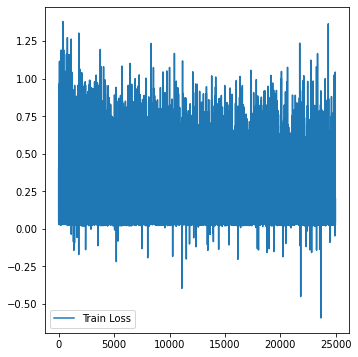

In [194]:

btl = np.asarray(train_losses).ravel()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(btl)
plt.legend(['Train Loss'])


In [202]:
import numpy as np

a = np.array([1,2,3])
b = np.pad(a,3, mode = 'constant', constant_values = 1 )
b

array([1, 1, 1, 1, 2, 3, 1, 1, 1])

In [344]:
wavs_path = glob(os.path.join('/home/lab/Documents/Human/ESC-50-master/Test', '*', '*'))
test_data = Data(wavs_path)

test_loader = DataLoader(test_data, batch_size=16, shuffle=True)

model.eval()
count = 0
for i, data in enumerate(test_loader):
    x, y = data
    batch, height, width = x.size()
    x = x.view(batch, 1, height, width)
    x = x.to(device, dtype=torch.float32)
    y = y.to(device, dtype=torch.long)
    y_hat = model(x)
    
    

    for b in range(batch):
        pred = (torch.argmax(y_hat[b]) +1).item()
        ground_truth = y[b].item()  
        if ground_truth!= pred:
            print("ground truth:",ground_truth, 'prediction:',pred )
            count +=1
            
print("error count", count)


/home/lab/pytoch1.5/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app



ground truth: 16 prediction: 15
ground truth: 4 prediction: 14
ground truth: 7 prediction: 13
ground truth: 6 prediction: 5
ground truth: 4 prediction: 3
ground truth: 2 prediction: 15
ground truth: 4 prediction: 1
ground truth: 5 prediction: 8
ground truth: 16 prediction: 15
ground truth: 12 prediction: 4
ground truth: 10 prediction: 7
ground truth: 20 prediction: 12
ground truth: 7 prediction: 17
ground truth: 20 prediction: 17
ground truth: 14 prediction: 17
ground truth: 13 prediction: 17
error count 16


power_to_db 후, 4096
power_to_db 후, 4096
power_to_db 후, 4096
power_to_db 후, 4096


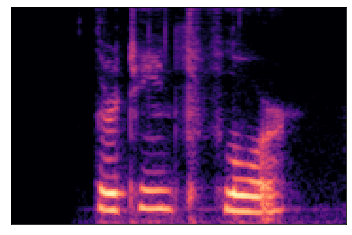

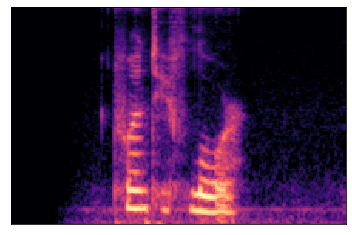

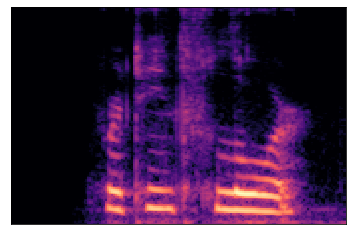

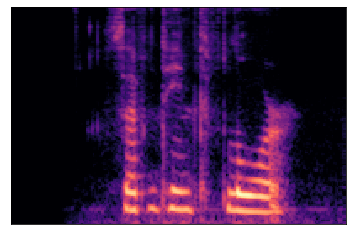

In [231]:
file_path_13 = '/home/lab/Documents/Human/ESC-50-master/Record/13/정정원_13.wav'
file_path_20 = '/home/lab/Documents/Human/ESC-50-master/Record/20/정정원_20.wav'
file_path_14 = '/home/lab/Documents/Human/ESC-50-master/Record/14/정정원_14.wav'
file_path_17 = '/home/lab/Documents/Human/ESC-50-master/Record/17/정정원_17.wav'

files = [file_path_13, file_path_20, file_path_14, file_path_17]
for f in files:
    wav, sr = librosa.load(f)
    spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=int(1024),hop_length=int(n_fft/4), n_mels=128, fmin=20, fmax=8300) #x:time, y:amplitude


    print("power_to_db 후, 4096")
    plt.figure()
    spec_db = librosa.power_to_db(spec, ref=np.max)
    librosa.display.specshow(spec_db)



In [247]:
import shutil
tests = [ '/home/lab/Documents/Human/ESC-50-master/Test/test1', '/home/lab/Documents/Human/ESC-50-master/Test/test2']
save_dir = '/home/lab/Documents/Human/ESC-50-master/Test'

for test in tests:
    folders = glob(os.path.join(test, '*'))
    for f in folders:
        c = f.split('/')[-1].split('.')[0]
        rename = test.split('/')[-1] + '_'+ f.split('/')[-1]
        shutil.move(f, os.path.join(save_dir, c, rename))